<a href="https://colab.research.google.com/github/osh9149/2022_DataScience/blob/main/WordCloud_%EC%96%B4%EB%A6%B0%EC%99%95%EC%9E%90%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#konlpy
- 한국어를 처리하는 대표적인 형태소 분석 패키지

In [17]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 57.4 MB/s 


In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

#삼국지 책의 내용 중 단어의 등장하는 횟수를 센다(텍스트를 메모장에서 utf-8 인코딩 방식으로 저장해야함)

In [20]:
with open('text33.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

#한글 폰트 설치 필요

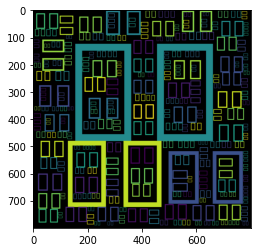

In [22]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

#어린왕자 영어 책 내용 워드 클라우드 분석

In [15]:
import operator
import string
#1. 어린왕자 텍스트 파일을 읽어와서 단어가 등장하는 횟수 카운트(counts 딕셔너리에 저장)
f = open('test33.txt', encoding='utf-8')
counts = dict()
for line in f:
    line = line.rstrip()
    line = line.translate(line.maketrans('', '', string.punctuation))
    line = line.lower()
    words = line.split()
    for word in words:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1

print(counts)


UnicodeDecodeError: ignored

#단어의 횟수에 따라 많은 순으로 정렬

In [2]:
#2. counts 딕셔너리의 등장 횟수 '값'에 따라 정렬
sorted_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse = True) 
print(sorted_counts[:100])

[('the', 829), ('i', 403), ('a', 396), ('to', 366), ('and', 333), ('of', 278), ('he', 255), ('you', 252), ('little', 232), ('prince', 171), ('that', 166), ('was', 161), ('said', 158), ('my', 143), ('but', 140), ('it', 136), ('for', 132), ('in', 130), ('me', 114), ('is', 107), ('on', 105), ('be', 102), ('his', 97), ('one', 96), ('have', 90), ('at', 85), ('all', 85), ('its', 83), ('are', 82), ('what', 77), ('if', 75), ('so', 74), ('as', 71), ('they', 69), ('then', 69), ('had', 69), ('no', 65), ('this', 65), ('planet', 65), ('him', 64), ('very', 61), ('not', 59), ('with', 58), ('like', 58), ('them', 57), ('im', 57), ('when', 53), ('from', 49), ('do', 49), ('flower', 49), ('by', 48), ('there', 45), ('good', 45), ('your', 43), ('never', 42), ('an', 41), ('who', 41), ('stars', 40), ('out', 40), ('too', 39), ('time', 38), ('would', 38), ('know', 38), ('sheep', 38), ('up', 37), ('where', 37), ('can', 36), ('just', 36), ('fox', 35), ('again', 33), ('dont', 33), ('about', 32), ('asked', 32), ('s

#빈도수가 많은 단어가 크기순으로 워드클라우드를 생성

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

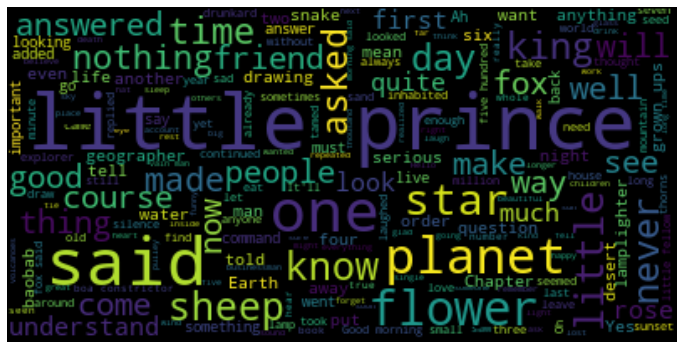

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
from wordcloud import WordCloud

text=open('thelittleprince.txt').read()
wordcloud=WordCloud().generate(text)

wordcloud.words_
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.savefig('cloud1.png')  #이미지로 저장
files.download('cloud1.png') #내컴퓨터로 다운로드

plt.show()


#어린왕자 이미지를 마스크로 만들어 워드클라우드를 생성

In [4]:
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS

prince_mask=np.array(Image.open("littleprince_mask.jpg"))
stopwords=set(STOPWORDS)
stopwords.add("said")
prince_mask

array([[[255, 255, 231],
        [255, 255, 231],
        [255, 254, 233],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 231],
        [255, 254, 233],
        [255, 254, 233],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 254, 233],
        [255, 254, 233],
        [255, 254, 233],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]]

#마스크 이미지 보기

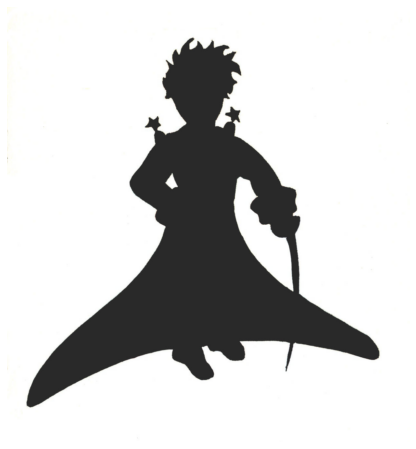

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(prince_mask,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis("off")
plt.show()

#워드클라우드를 생성할 단어들의 빈도수에 따른 크기

In [6]:
wc=WordCloud(background_color="white",max_words=2000,mask=prince_mask,stopwords=stopwords)
wc=wc.generate(text)
wc.words_

{'little prince': 1.0,
 'one': 0.6089385474860335,
 'planet': 0.39106145251396646,
 'flower': 0.35195530726256985,
 'star': 0.2849162011173184,
 'little': 0.2346368715083799,
 'know': 0.2122905027932961,
 'sheep': 0.2122905027932961,
 'time': 0.2011173184357542,
 'never': 0.19553072625698323,
 'king': 0.19553072625698323,
 'fox': 0.19553072625698323,
 'day': 0.18994413407821228,
 'asked': 0.1787709497206704,
 'made': 0.16759776536312848,
 'nothing': 0.16201117318435754,
 'good': 0.15083798882681565,
 'make': 0.1452513966480447,
 'course': 0.1452513966480447,
 'come': 0.1452513966480447,
 'people': 0.13966480446927373,
 'see': 0.13966480446927373,
 'way': 0.13966480446927373,
 'friend': 0.13966480446927373,
 'will': 0.13966480446927373,
 'well': 0.13966480446927373,
 'now': 0.13966480446927373,
 'answered': 0.1340782122905028,
 'thing': 0.1340782122905028,
 'understand': 0.12849162011173185,
 'quite': 0.12849162011173185,
 'look': 0.12849162011173185,
 'much': 0.12290502793296089,
 'ros

#마스크 이미지에 워드클라우드 생성

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

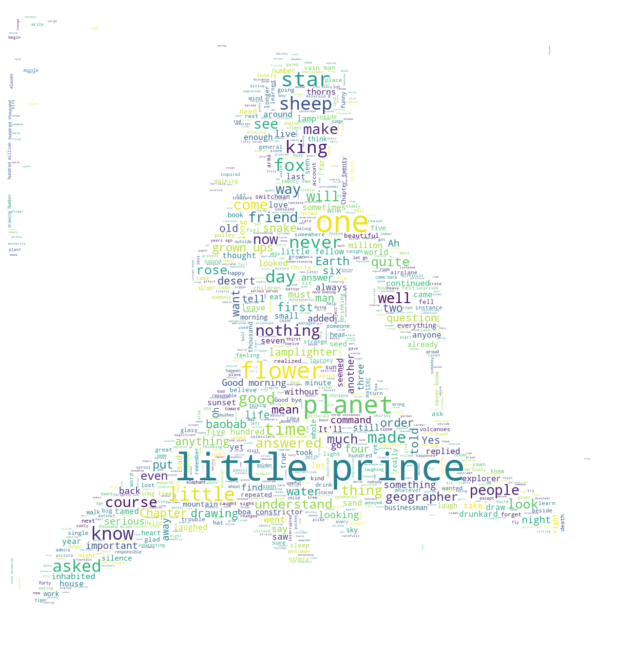

In [7]:
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")

plt.savefig('cloud2.png')  #이미지로 저장
files.download('cloud2.png') #내컴퓨터로 다운로드

plt.show()


#흑백으로 만들기

In [10]:
# BLACK BACKGROUND WITH GREY LETTERS
import random
# text=open('thelittleprince.txt').read()

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

wc=WordCloud(background_color="white",max_words=2000,mask=prince_mask,stopwords=stopwords)
wc=wc.generate(text)
wc.recolor(color_func=grey_color_func)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

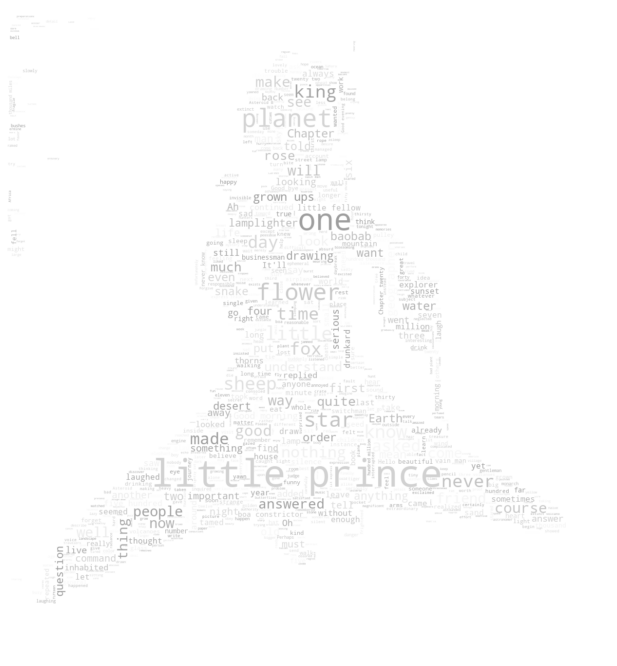

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")

plt.savefig('cloud3.png')  #이미지로 저장
files.download('cloud3.png') #내컴퓨터로 다운로드

plt.show()